<a href="https://colab.research.google.com/github/guupiii/ESAA/blob/main/ESAA_YB3_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# train data 열기
traindata=pd.read_csv('/content/drive/MyDrive/MLData/winetrain.csv')
traindata.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
# test data 열기
testdata=pd.read_csv('/content/drive/MyDrive/MLData/winetest.csv')
testdata.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [ ]:
# sample submission 열기
samplesubmission=pd.read_csv('/content/drive/MyDrive/MLData/sample_submission.csv')
samplesubmission.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


## 데이터 전처리

In [ ]:
traindata.shape

(5497, 14)

In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


index 구분자

quality 품질

fixed acidity 산도

volatile acidity 휘발성산

citric acid 시트르산

residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분

chlorides 염화물

free sulfur dioxide 독립 이산화황

total sulfur dioxide 총 이산화황

density 밀도

pH 수소이온농도

sulphates 황산염

alcohol 도수

type 종류

**NaN, Null값은 존재하지 않음**

In [ ]:
traindata.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


### index 피처 제거

In [ ]:
# index 피처 제거
traindata.drop(['index'],axis=1,inplace=True)
testdata.drop(['index'],axis=1,inplace=True)

### type 변수를 white=0, red=1로 변경

In [ ]:
# type 변수를 white=0, red=1로 변경
traindata['type']=traindata['type'].map({'white':0,'red':1}).astype(int)
testdata['type']=testdata['type'].map({'white':0,'red':1}).astype(int)

In [ ]:
# traindata 확인
traindata.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [ ]:
# testdata 확인
testdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0


## 탐색적 자료 분석

### **1. 전체적인 상관관계 보기**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

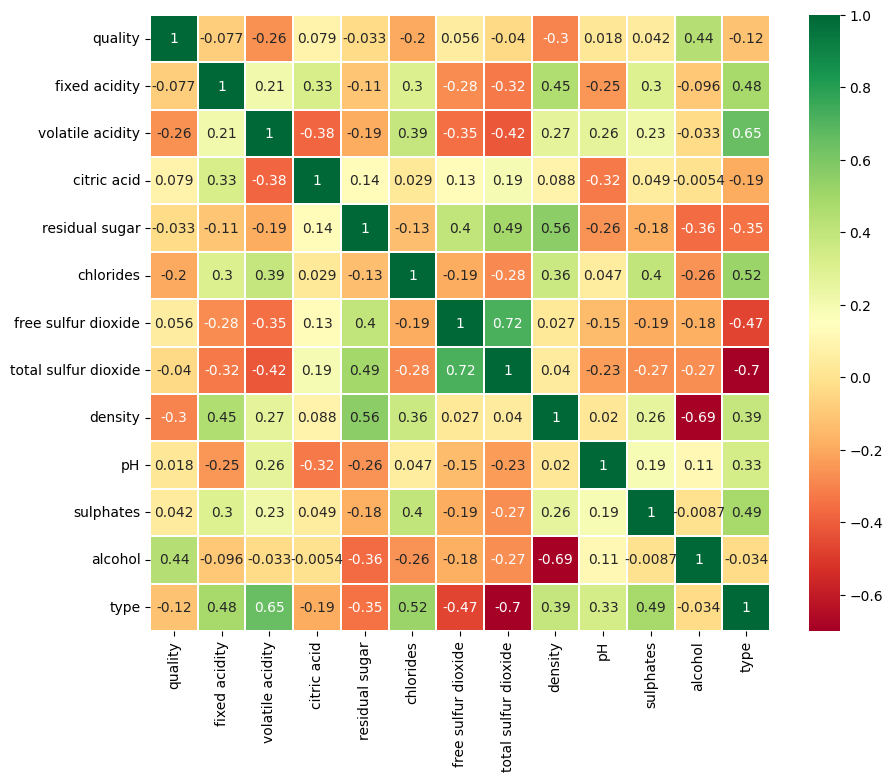

In [ ]:
cols=['quality','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','type']
sns.heatmap(traindata[cols].corr(),annot=True,cmap='RdYlGn',linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### **2. 품질이 어떻게 분포되어 있는가?**

- 6이 가장 많고, 5와 7까지 많다.
- 3, 9는 매우 적다.

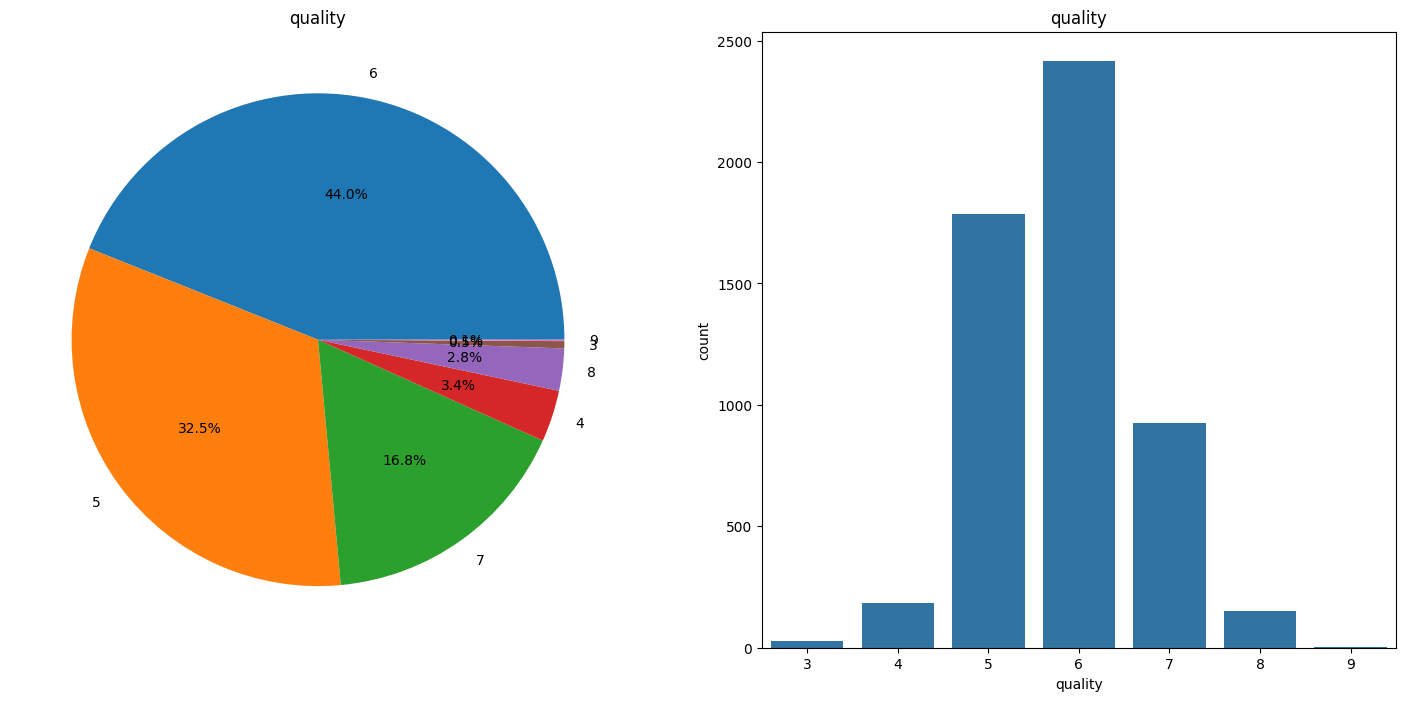

In [ ]:
# traindata에서 quality를 원그래프, 막대그래프로 그려보기
f,ax=plt.subplots(1,2,figsize=(18,8))
# Calculate the number of unique quality values
num_qualities = traindata['quality'].nunique()

traindata['quality'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('quality')
ax[0].set_ylabel('')
sns.countplot(x='quality',data=traindata,ax=ax[1])
ax[1].set_title('quality')
plt.show()

### **3. 다른 피처들의 분포는 어떻게 나타나는가? - 히스토그램**

/tmp/ipython-input-1060339867.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindata['fixed acidity'],ax=ax[0,0])
/tmp/ipython-input-1060339867.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindata['volatile acidity'],ax=ax[0,1])
/tmp/ipython-input-1060339867.py:6: UserWarning: 



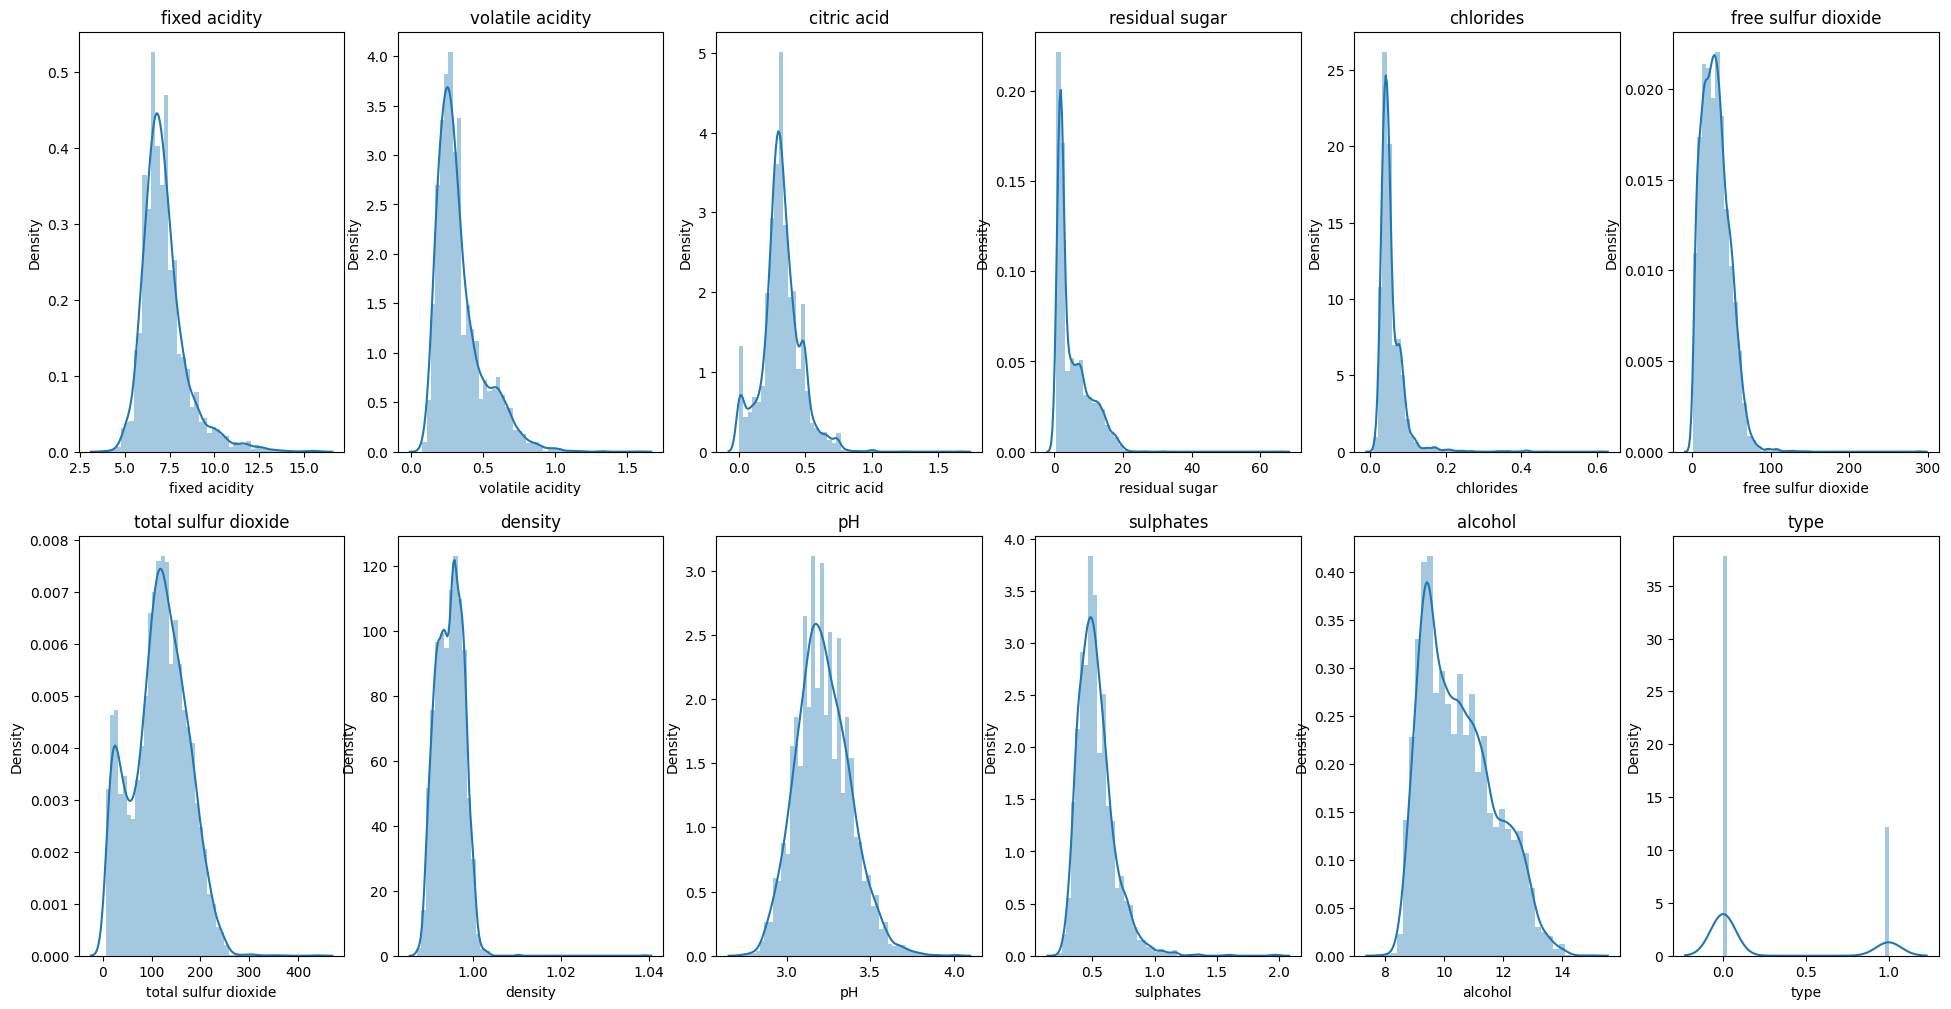

In [ ]:
f,ax=plt.subplots(2,6,figsize=(24,12))
sns.distplot(traindata['fixed acidity'],ax=ax[0,0])
ax[0,0].set_title('fixed acidity')
sns.distplot(traindata['volatile acidity'],ax=ax[0,1])
ax[0,1].set_title('volatile acidity')
sns.distplot(traindata['citric acid'],ax=ax[0,2])
ax[0,2].set_title('citric acid')
sns.distplot(traindata['residual sugar'],ax=ax[0,3])
ax[0,3].set_title('residual sugar')
sns.distplot(traindata['chlorides'],ax=ax[0,4])
ax[0,4].set_title('chlorides')
sns.distplot(traindata['free sulfur dioxide'],ax=ax[0,5])
ax[0,5].set_title('free sulfur dioxide')
sns.distplot(traindata['total sulfur dioxide'],ax=ax[1,0])
ax[1,0].set_title('total sulfur dioxide')
sns.distplot(traindata['density'],ax=ax[1,1])
ax[1,1].set_title('density')
sns.distplot(traindata['pH'],ax=ax[1,2])
ax[1,2].set_title('pH')
sns.distplot(traindata['sulphates'],ax=ax[1,3])
ax[1,3].set_title('sulphates')
sns.distplot(traindata['alcohol'],ax=ax[1,4])
ax[1,4].set_title('alcohol')
sns.distplot(traindata['type'],ax=ax[1,5])
ax[1,5].set_title('type')
plt.show()

### **4. 품질(가로)에 따라 다른 변수들이 어떻게 나타나는가?**

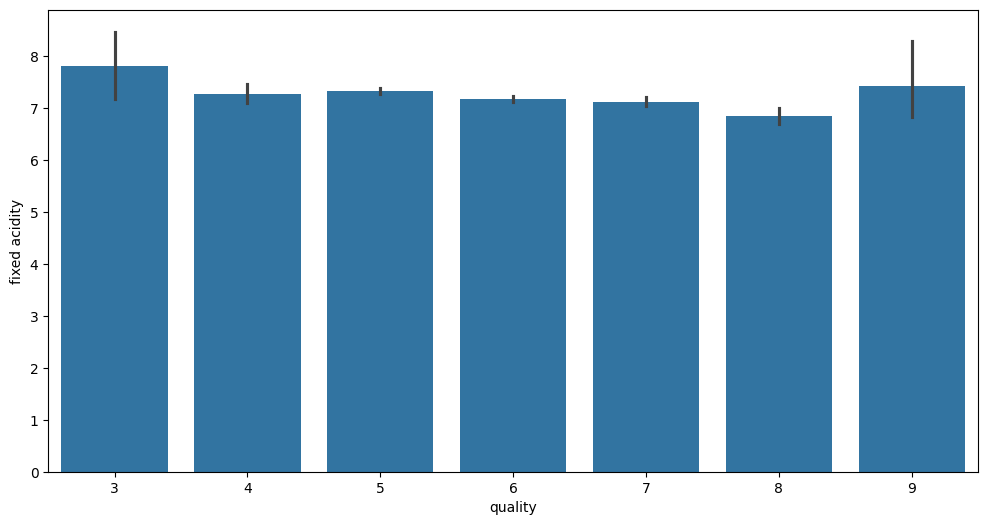

In [ ]:
# quality(가로) fixed acidity
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='fixed acidity',data=traindata)
plt.show()

### 3과 9에서 fixed acidity 평균이 높게 나왔는데, 그냥 3과 9의 수가 적어서 그런 것 같음.

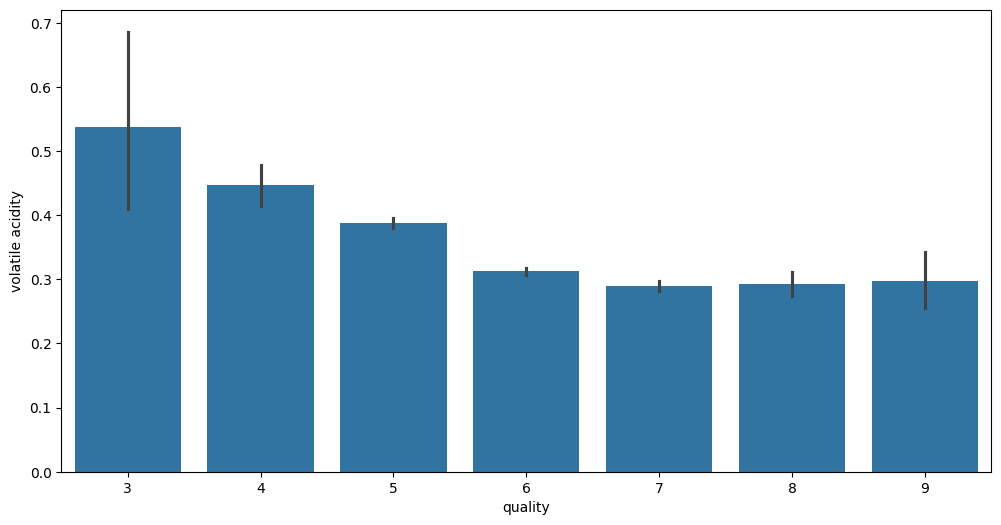

In [ ]:
# quality(가로) volatile acidity
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='volatile acidity',data=traindata)
plt.show()

### 4~7까지(traindata 수가 많은 것들)에서 volatile acidity에서 차이가 남.
### 3에서는 데이터 수가 적어서 잘 모르겠음.

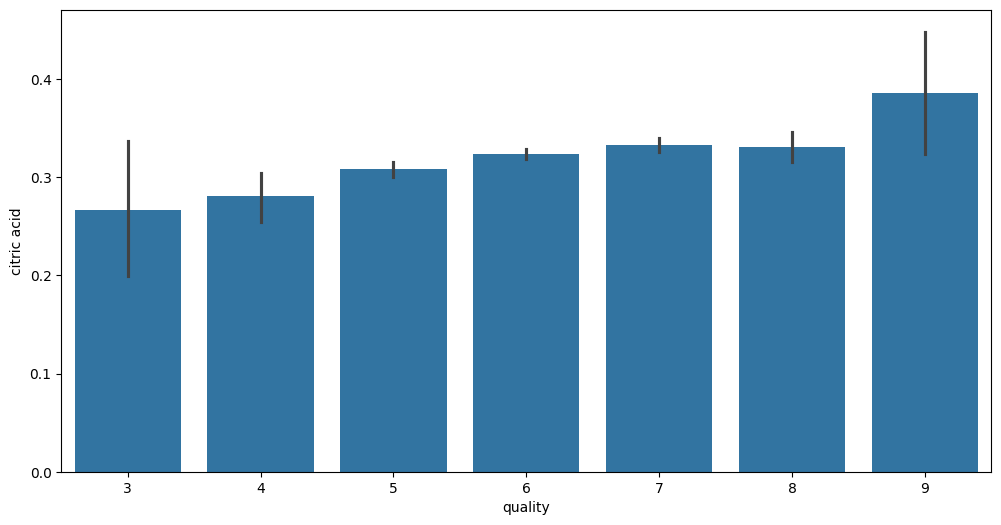

In [ ]:
# quality(가로) citric acid
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='citric acid',data=traindata)
plt.show()

### 3과 9는 자료의 수가 적음.
### 4~7까지에서 citric acid가 증가하는 추세를 보임.
### 8에서는 7과 비슷..

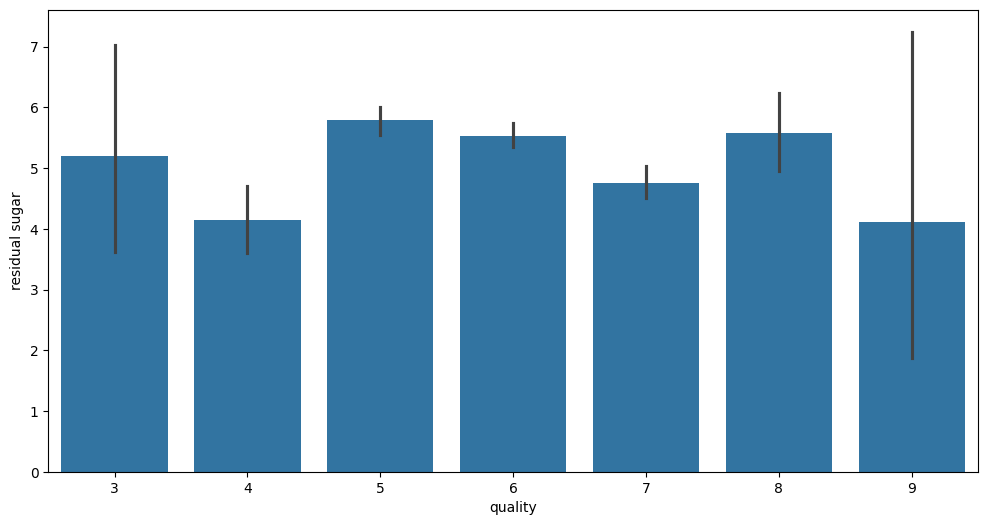

In [ ]:
# quality(가로) residual sugar
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='residual sugar',data=traindata)
plt.show()

### 5, 6과 7 사이에서 눈에 띄게 차이가 남.
### 3. 4. 8. 9도 차이가 잘 나타나긴 하지만 자료의 수가 적음.

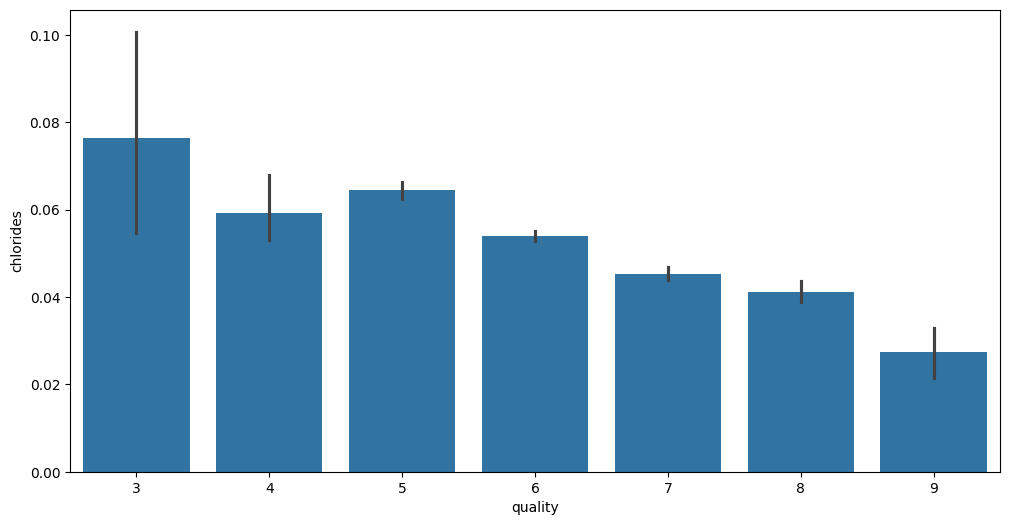

In [ ]:
# quality(가로) chlorides
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='chlorides',data=traindata)
plt.show()

### cholrides에 대해서는 quality가 높아질수록 줄어드는 추세.

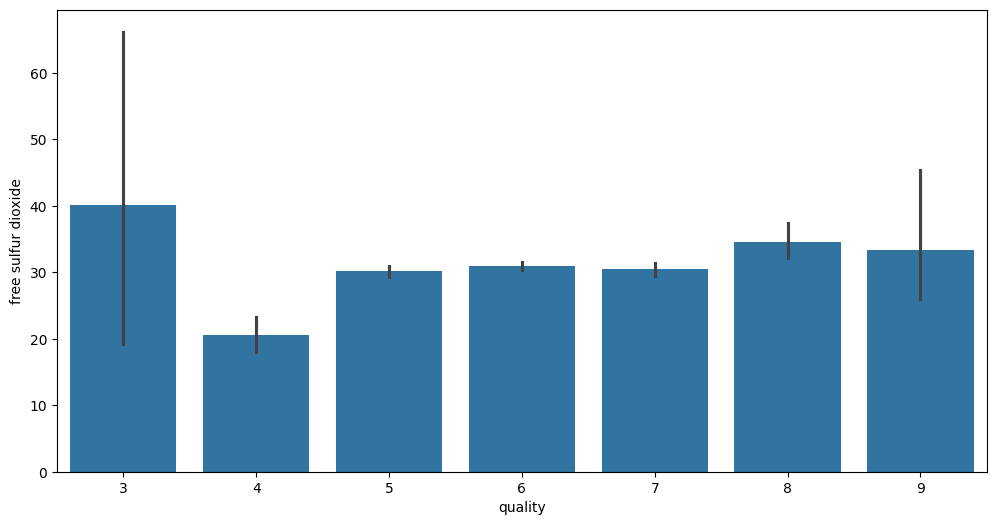

In [ ]:
# quality(가로) free sulfur dioxide
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='free sulfur dioxide',data=traindata)
plt.show()

### free sulfur dioxide는 5, 6, 7에서 거의 비슷함.
### 4와 8에서 큰 변화가 보임.

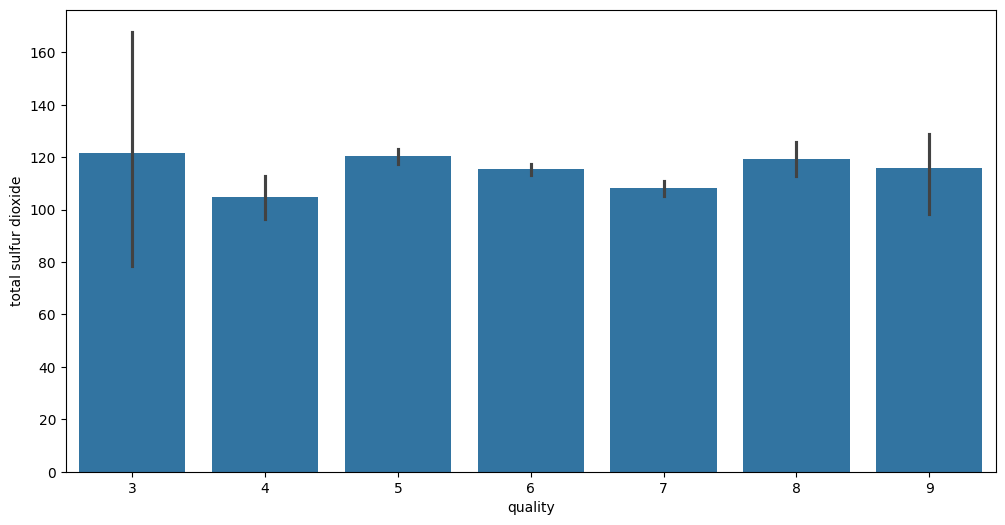

In [ ]:
# quality(가로) total sulfur dioxide
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='total sulfur dioxide',data=traindata)
plt.show()

### 5~7에서 total sulfur dioxide가 줄어드는 추세로 나타남.

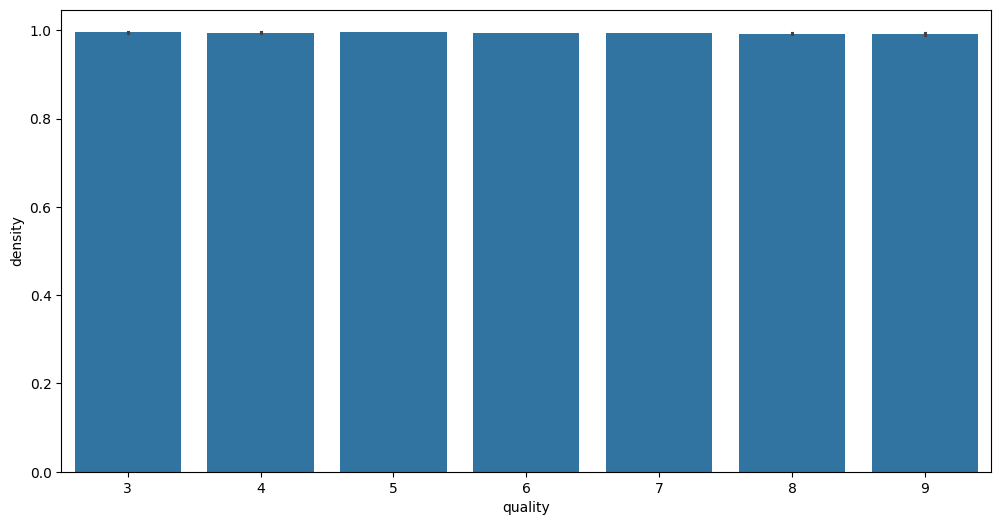

In [ ]:
# quality(가로) density
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='density',data=traindata)
plt.show()

### density의 경우 경향이 보이는 것은 없음.

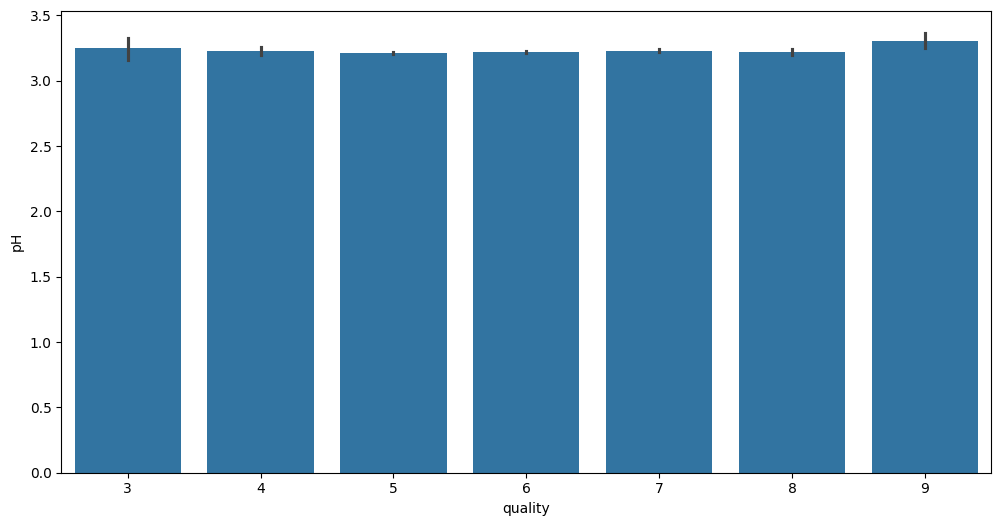

In [ ]:
# quality(가로) pH
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='pH',data=traindata)
plt.show()

### pH의 경우에도 크게 보이는 것 없음.

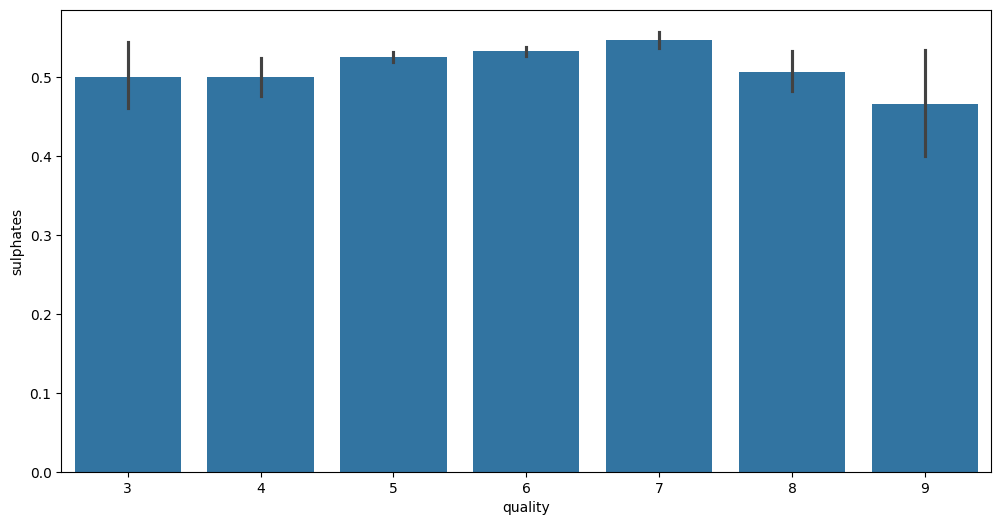

In [ ]:
# quality(가로) sulphates
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='sulphates',data=traindata)
plt.show()

### 4~7에서 sulphates가 증가하는 추세를 보임.

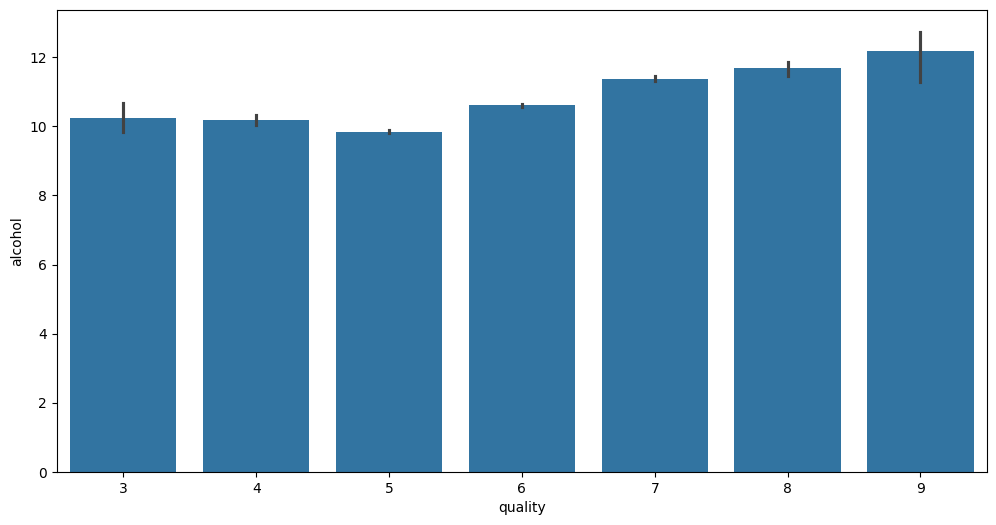

In [ ]:
# quality(가로) alcohol
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='alcohol',data=traindata)
plt.show()

### 5~8까지 alcohol이 증가하는 추세임. quality가 높을수록 alcohol이 증가??

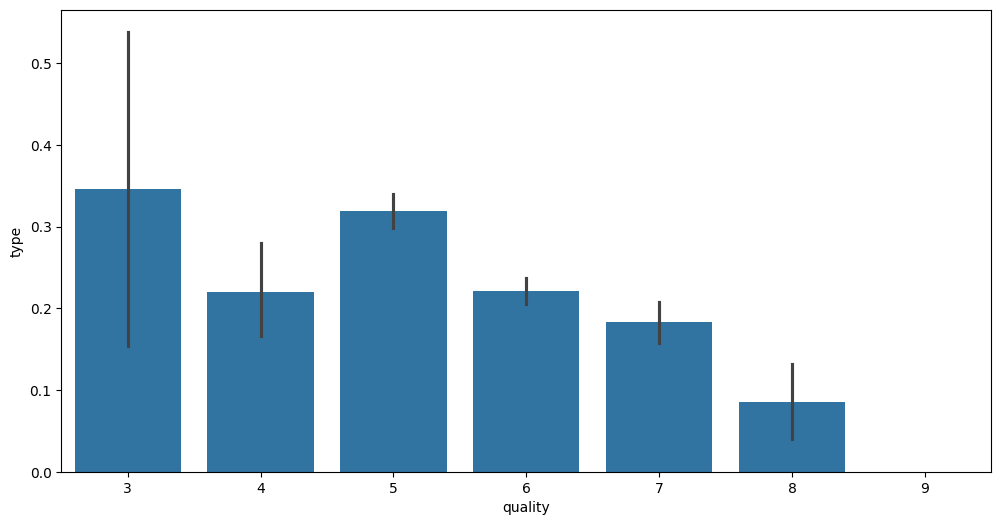

In [ ]:
# quality(가로) type
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='type',data=traindata)
plt.show()

### white의 개수가 red보다 더 많음.
### 5~7에서 white 와인의 수가 늘어남. 9에서는 대부분 white인 듯.

**quality 9의 와인의 종류만 알아보기**

In [ ]:
# quality 9의 와인의 종류
traindata[traindata['quality']==9]

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
561,9,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,0
2194,9,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,0
2324,9,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,0
3198,9,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,0
3497,9,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,0


### **5. quality와 크게 상관관계를 나타내는 것**

1. volatile acidity: -0.26
2. chlorides: -0.2
3. density: -0.3
4. alcohol: 0.44

**->이것들만 boxplot을 그려보자**

#### **5-1. 휘발성 산도가 낮을수록 품질이 좋다**

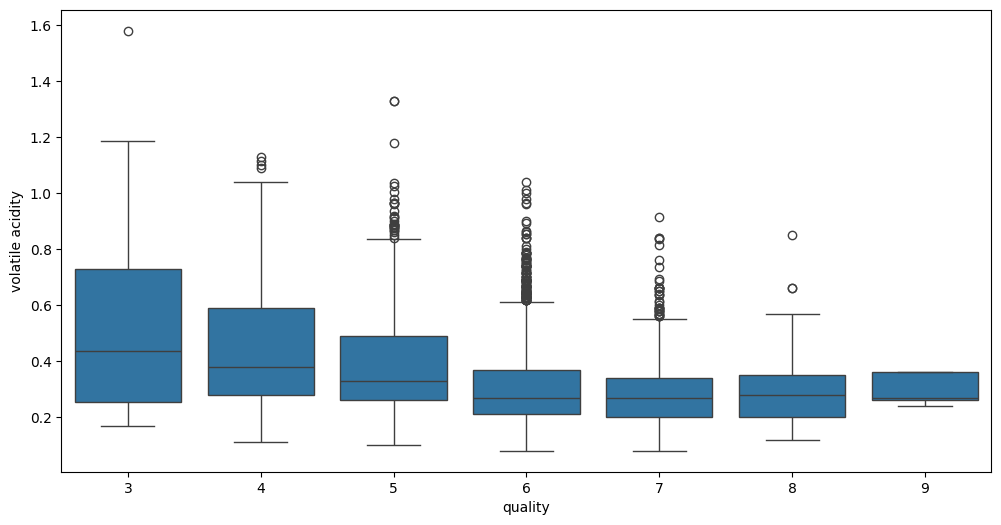

In [ ]:
# volatile acidity
plt.figure(figsize=(12,6))
sns.boxplot(x='quality',y='volatile acidity',data=traindata)
plt.show()

### 품질이 높아질수록 박스의 중앙값이 낮아지고 있기에 휘발성 산도가 낮을수록 품질이 좋은 경향이 있음

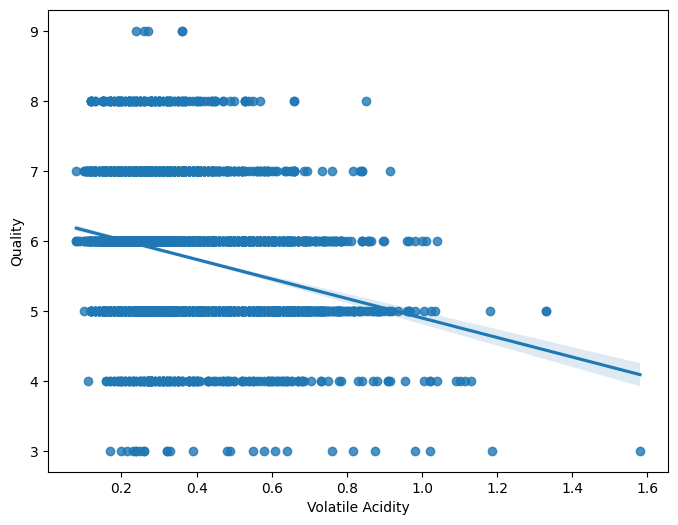

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='volatile acidity', y='quality', data=traindata)
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()

### 회귀선으로 봤을 때, 확실히 품질이 낮아질수록 휘발성 산도가 높아지는 것이 보임

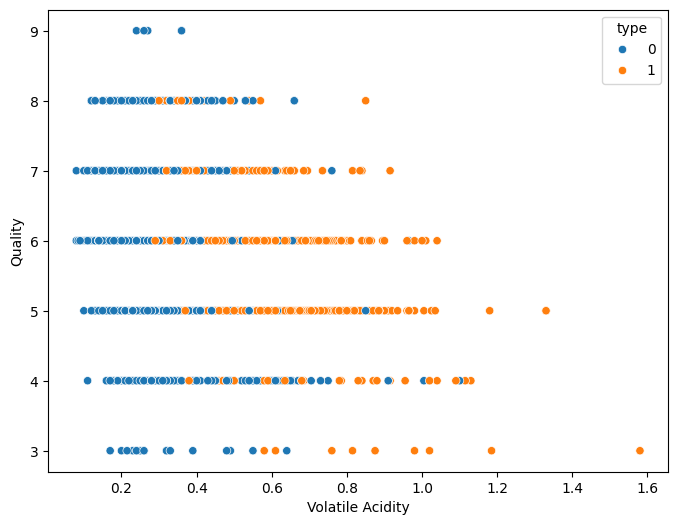

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='volatile acidity', y='quality', hue='type', data=traindata)
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()

### 레드와인이 대체로 휘발성 산도가 높게 나타남

#### **5-2. 칼로리가 낮을수록 품질이 높다**

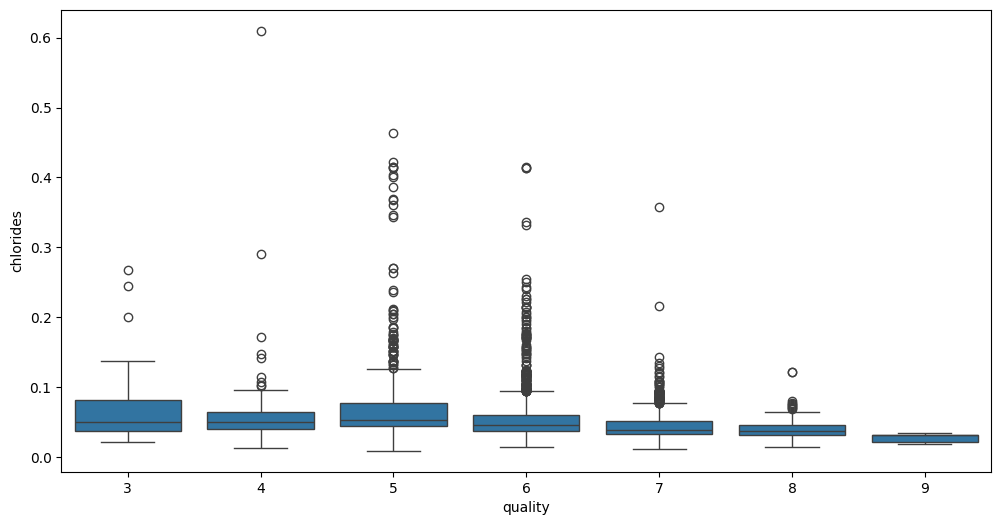

In [ ]:
# chlorides
plt.figure(figsize=(12,6))
sns.boxplot(x='quality',y='chlorides',data=traindata)
plt.show()

#### **5-3. 밀도가 낮을수록 품질이 좋다**

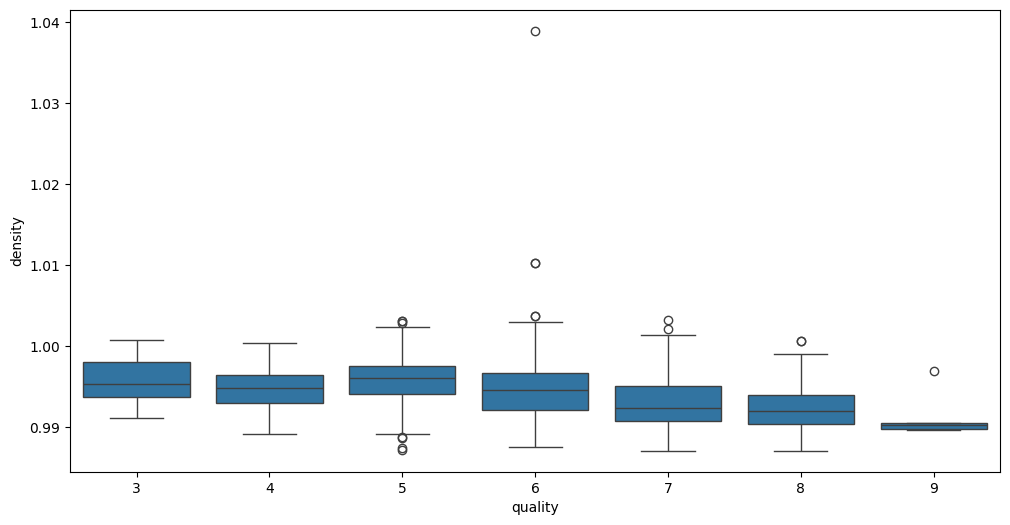

In [ ]:
# density
plt.figure(figsize=(12,6))
sns.boxplot(x='quality',y='density',data=traindata)
plt.show()

#### **5-4. 알코올 도수가 높을수록 품질이 좋다**

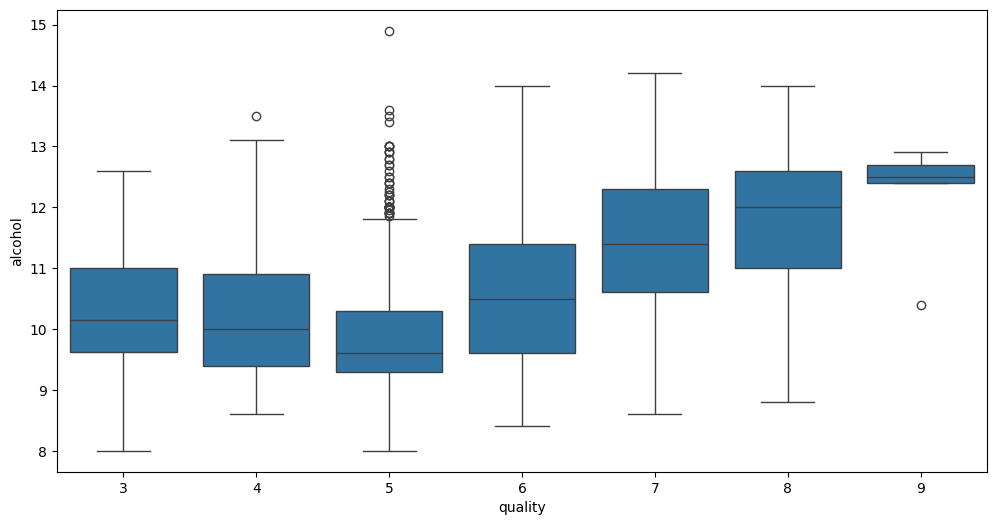

In [ ]:
# alcohol
plt.figure(figsize=(12,6))
sns.boxplot(x='quality',y='alcohol',data=traindata)
plt.show()

### 중앙값이 품질 오른쪽으로 갈수록 위로 이동하고 있기에 알코올 도수가 높을수록 품질이 좋다는 점을 확인할 수 있음

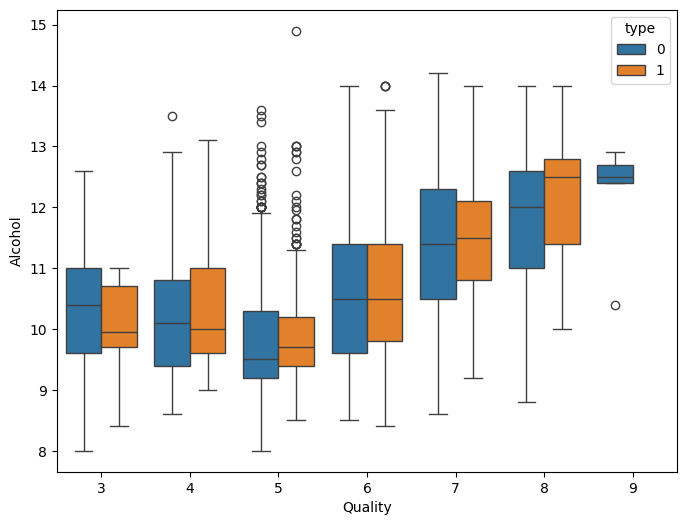

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='quality', y='alcohol', data=traindata, hue='type')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

### 종류별 차이를 봤을 때, 파란색인 화이트와인은 품질이 증가할 때 알코올이 급격히 상승하고 레드와인은 완만하게 상승함
### 전반적으로 알코올 도수가 높을수록 품질이 높은 경향은 있지만, 이 가설은 화이트와인에서 더 강하게 나타나는 것으로 보임
### 레드와인은 이미 평균적으로 알코올이 높아서 품질 간 차이가 작은 것으로 판단됨

### **6. 다른 요인 간의 관계**

#### 6-1. 와인 종류별 잔당

**화이트와인의 잔당 > 레드와인의 잔당**

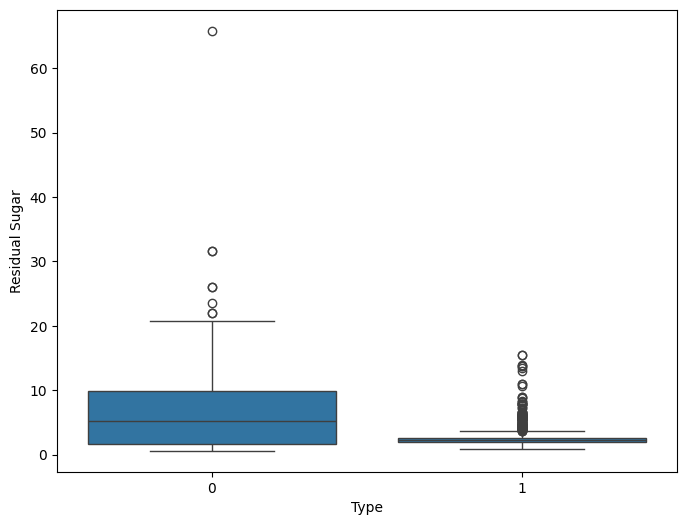

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='type', y='residual sugar', data=traindata)
plt.xlabel('Type')
plt.ylabel('Residual Sugar')
plt.show()

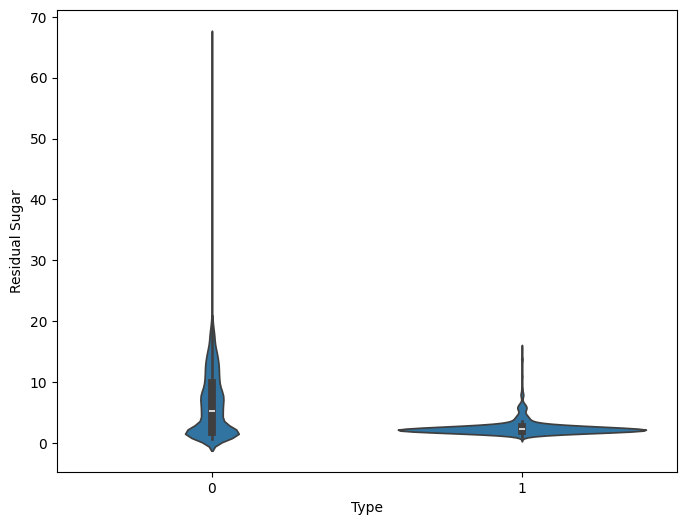

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(x='type', y='residual sugar', data=traindata)
plt.xlabel('Type')
plt.ylabel('Residual Sugar')
plt.show()

### 화이트와인이 위쪽으로 더 길게 늘어나고 있기에 더 높은 잔당을 많이 가지고 있음을 알 수 있음

#### 6-2. 와인 종류별 밀도

**화이트와인의 밀도 < 레드와인의 밀도**

당이 높으면 밀도가 높은데 왜 화이트와인의 밀도가 더 낮지...? >> **알코올 도수와도 관련이 있을 것 같음**

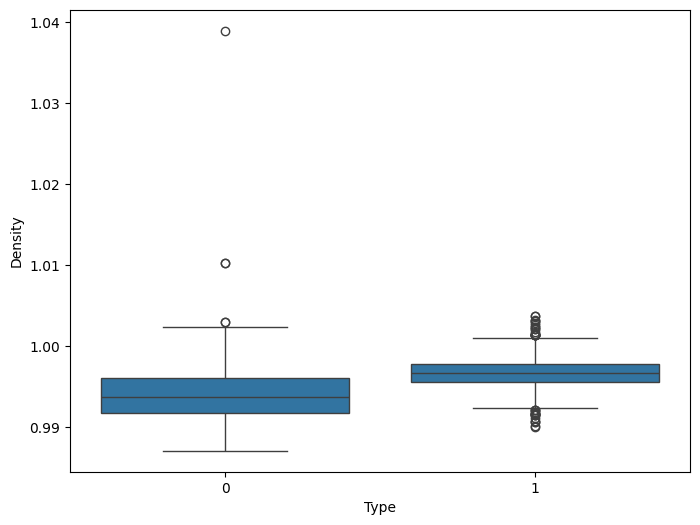

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='type', y='density', data=traindata)
plt.xlabel('Type')
plt.ylabel('Density')
plt.show()

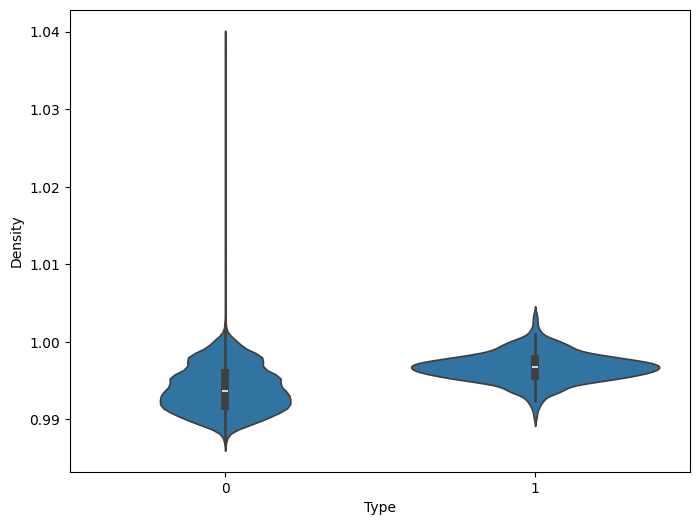

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(x='type', y='density', data=traindata)
plt.xlabel('Type')
plt.ylabel('Density')
plt.show()

#### 6-3. 밀도와 알코올

**알코올이 높을수록 밀도가 낮아짐**

**화이트와인은 당이 많지만 알코올이 훨씬 많아서 밀도가 더 낮게 측정됨**

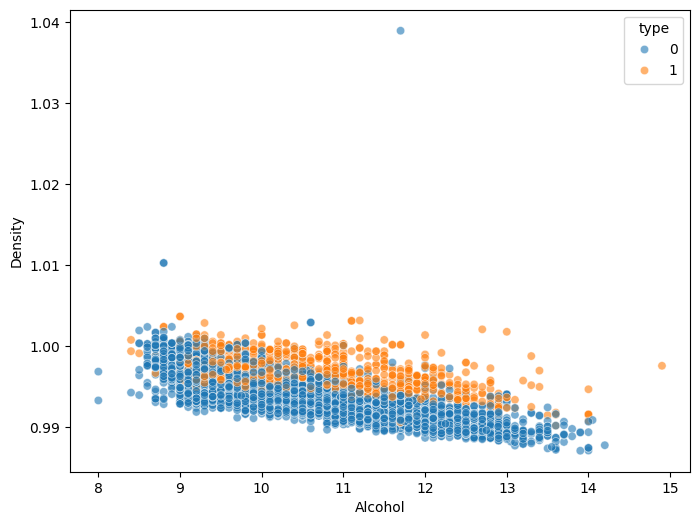

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='alcohol', y='density', hue='type', data=traindata, alpha=0.6)
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()

### 알코올이 높을수록 밀도가 낮아지는 경향이 보임
### 그러면 알코올이 밀도에 추가적인 영향을 주나봄
### 당보다 알코올이 밀도에 더 큰 영향을 미치는 것으로 보임
### 화이트와인은 당이 많지만 알코올이 훨씬 더 많아서 밀도가 더 낮게 측정되는 듯

! XGBoost로 피처 중요도 확인

! LightGBM으로 피처 중요도 확인

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Define features (X) and target (y)
X = traindata.drop('quality', axis=1)
y = traindata['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

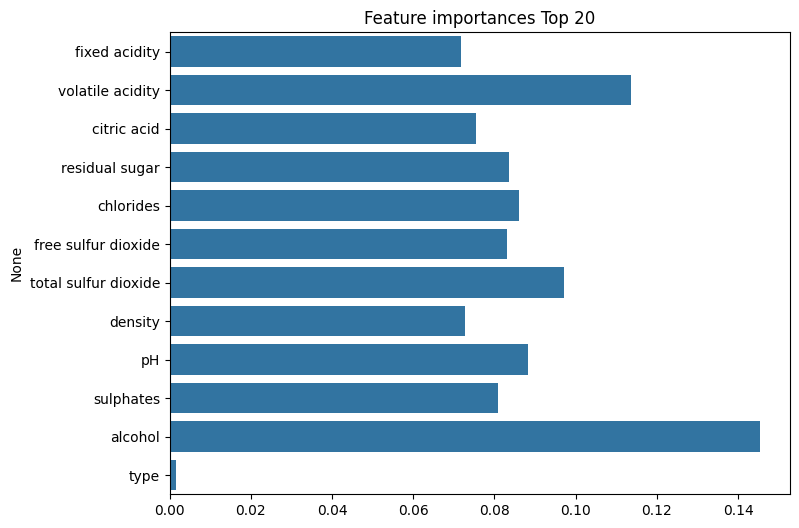

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=dt_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=dt_clf.feature_importances_,y=ftr_importances.index)
plt.show()

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier(n_estimators=400,early_stopping_round=100,eval_metric='logloss',verbose=-1)
evals=[(X_test,y_test)]
lgbm_clf.fit(X_train,y_train,eval_set=evals)

lgbm_preds=lgbm_clf.predict(X_test)
pred_proba=lgbm_clf.predict_proba(X_test)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

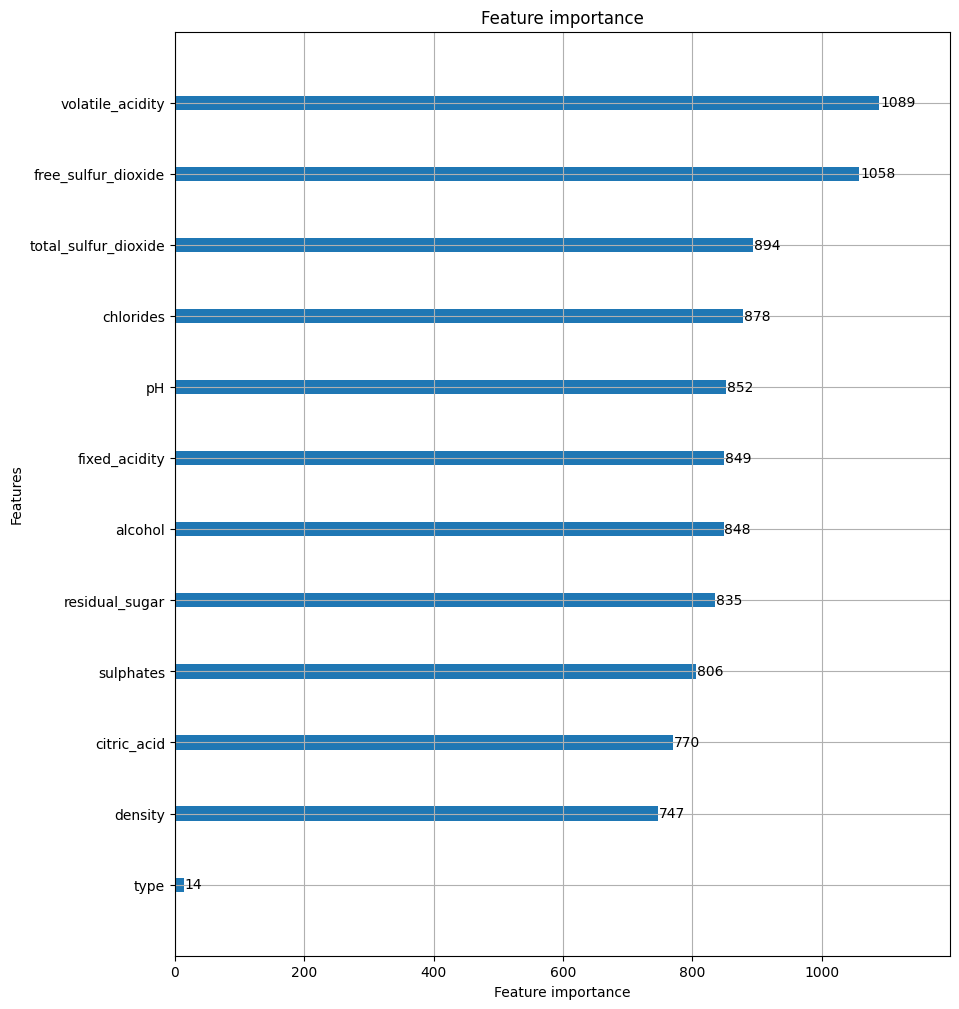

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_clf,ax=ax)

///////////////////////////////////////////////////

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42

# 타깃과 피처 분리
X_train = traindata.drop(columns=['quality']).copy()
y_train = traindata['quality'].copy()
X_test  = testdata.copy()

# 범주형 인코딩
X_all = pd.concat([X_train, X_test], axis=0, ignore_index=True)
for c in X_all.columns:
    if X_all[c].dtype == 'object':
        X_all[c] = X_all[c].astype('category')
        X_all[c] = X_all[c].cat.codes

# 다시 분할
X_train = X_all.iloc[:len(X_train)].reset_index(drop=True)
X_test  = X_all.iloc[len(X_train):].reset_index(drop=True)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Train y distribution:\n", y_train.value_counts().sort_index())


Train shape: (5497, 12)  Test shape: (1000, 12)
Train y distribution:
 quality
3      26
4     186
5    1788
6    2416
7     924
8     152
9       5
Name: count, dtype: int64


In [ ]:
K = 1
SMOTE(random_state=RANDOM_STATE, k_neighbors=K)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

rf_pipeline = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE, k_neighbors=K)),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        class_weight='balanced',
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])
gb_pipeline = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE, k_neighbors=K)),
    ('clf', GradientBoostingClassifier(
        learning_rate=0.10,
        n_estimators=250,
        max_depth=3,
        random_state=RANDOM_STATE
    ))
])

def cv_eval(name, model):
    cv_res = cross_validate(model, X_train, y_train, cv=cv, scoring=metrics, n_jobs=-1, return_train_score=False)
    res = {m: np.mean(cv_res[f'test_{m}']) for m in metrics}
    print(f"[{name}] acc={res['accuracy']:.3f}  precM={res['precision_macro']:.3f}  "
          f"recM={res['recall_macro']:.3f}  f1M={res['f1_macro']:.3f}")
    return res

rf_res = cv_eval('RandomForest', rf_pipeline)
gb_res = cv_eval('GradientBoosting', gb_pipeline)

summary = pd.DataFrame([rf_res, gb_res], index=['RandomForest','GradientBoosting'])
summary

[RandomForest] acc=0.627  precM=0.393  recM=0.371  f1M=0.378
[GradientBoosting] acc=0.536  precM=0.307  recM=0.330  f1M=0.316


,accuracy,precision_macro,recall_macro,f1_macro
RandomForest,0.626705,0.393313,0.370885,0.377501
GradientBoosting,0.536290,0.307016,0.330489,0.315970


불균형 데이터에 대해 SMOTE와 class_weight='balanced'를 적용한 결과,
RandomForest가 GradientBoosting 대비 더 우수한 성능을 보였다.
Accuracy는 0.63 수준이지만, Macro-F1이 낮은 것은 소수 클래스(3,9)의 표본 부족 때문으로 보인다.
Accuracy를 높이기 위해 적은 표본에 집중하기보다는 표본이 충분한 클래스들을 잘 분류하는 방향으로 진행하는 것이 좋아보인다.
따라서 이번에는 클래스 불균형을 해결하지 않고 분류


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)
scorer = make_scorer(accuracy_score)

rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)

param_dist = {
    'n_estimators': [200, 300, 400, 600, 800],
    'max_depth': [None, 6, 8, 10, 12, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5, 0.7, None],
    'bootstrap': [True, False]
}

rf_search_acc = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=40,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1,
    refit=True
)

rf_search_acc.fit(X_train, y_train)
print(f"\nBest Accuracy (CV): {rf_search_acc.best_score_:.4f}")
print("Best Params:\n", rf_search_acc.best_params_)

best_rf_acc = rf_search_acc.best_estimator_


Fitting 3 folds for each of 40 candidates, totalling 120 fits

Best Accuracy (CV): 0.6520
Best Params:
 {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


accuracy 가 조금 올랐다.
이번에는 feature engineering 을 통해 시도해볼 것이다.
원래 모델은 화학 성분 변수 그대로 학습하였지만 와인 품질은 단순히 각 성분의 양으로만 결정되지 않고 서로의 비율이나 조합도 중요한 역할을 할 수 있다는 점을 고려해야한다. 이번에는 상관관계 분석을 바탕으로 새로운 파생 변수(feature) 를 만들어 모델이 이런 복합적 관계를 학습하도록 시도!



In [83]:
EPS = 1e-5  # 0으로 나눔 방지

def add_new_features(df):
    df = df.copy()
    # 1) 핵심 비율/합
    df['alcohol_density_ratio'] = df['alcohol'] / (df['density'] + EPS)
    df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']
    df['acid_balance'] = df['citric acid'] / (df['volatile acidity'] + EPS)
    df['so2_ratio'] = df['free sulfur dioxide'] / (df['total sulfur dioxide'] + EPS)
    df['sugar_alcohol_ratio'] = df['residual sugar'] / (df['alcohol'] + EPS)
    df['density_inverse'] = 1.0 / (df['density'] + EPS)
    df['chlorides_inverse'] = 1.0 / (df['chlorides'] + EPS)
    df['acid_sugar_balance'] = (df['fixed acidity'] + df['citric acid']) / (df['residual sugar'] + 1.0)
    for c in ['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density']:
        df[f'log_{c}'] = np.log(df[c] + 1.0)
    return df

# Train/Test 분리 + 파생변수 추가
y_train = traindata['quality'].copy()
X_train = traindata.drop(columns=['quality']).copy()
X_test  = testdata.copy()

X_train_new = add_new_features(X_train)
X_test_new  = add_new_features(X_test)

# 문자열 범주형 있으면 동일 매핑으로 코드화
X_all = pd.concat([X_train_new, X_test_new], axis=0, ignore_index=True)
for c in X_all.columns:
    if X_all[c].dtype == 'object':
        X_all[c] = X_all[c].astype('category').cat.codes
X_train_new = X_all.iloc[:len(X_train_new)].reset_index(drop=True)
X_test_new  = X_all.iloc[len(X_train_new):].reset_index(drop=True)

X_train_new.shape, X_test_new.shape

((5497, 25), (1000, 25))

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)
scorer = make_scorer(accuracy_score)

rf_base = RandomForestClassifier(
    random_state=RANDOM_STATE, n_jobs=-1
)

# 이전 베스트를 중심으로 좁게 튜닝
param_dist_narrow = {
    'n_estimators': [600, 800, 1000],
    'max_depth': [None, 18, 22, 26],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['log2', 'sqrt', 0.5],
    'bootstrap': [False, True]
}

rf_search_acc = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist_narrow,
    n_iter=20,                 # 빠르게
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1,
    refit=True
)

rf_search_acc.fit(X_train_new, y_train)
print(f"\n[RF+FE Best CV Accuracy] {rf_search_acc.best_score_:.4f}")
print("[RF+FE Best Params]\n", rf_search_acc.best_params_)

best_rf_acc_fe = rf_search_acc.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
